In [4]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

Getting the errors data.

In [54]:
errors = pd.read_json('../../queried/errors/errors.json')

Getting the final data.

In [5]:
final_df_years = pd.read_json('../../queried/OC/group_by_year/normal.json')
final_df_journal = pd.read_json('../../queried/OC/group_by_year/by_journal.json')

Getting the data of the biggest journal of DOAJ.

In [11]:
group_journals = final_df_journal.groupby(['title'])['cited', 'citing', 'citations_to_DOAJ', 'cited_by_DOAJ'].sum()

PLoS ONE is the biggest journal of DOAJ in terms of the number of all types of citations.

In [12]:
group_journals.idxmax()

cited                PLoS ONE
citing               PLoS ONE
citations_to_DOAJ    PLoS ONE
cited_by_DOAJ        PLoS ONE
dtype: object

In [13]:
final_df_journal_1 = final_df_journal[final_df_journal['title'] == group_journals['citing'].idxmax()]

Plotting the comparison between the citing and cited numbers.

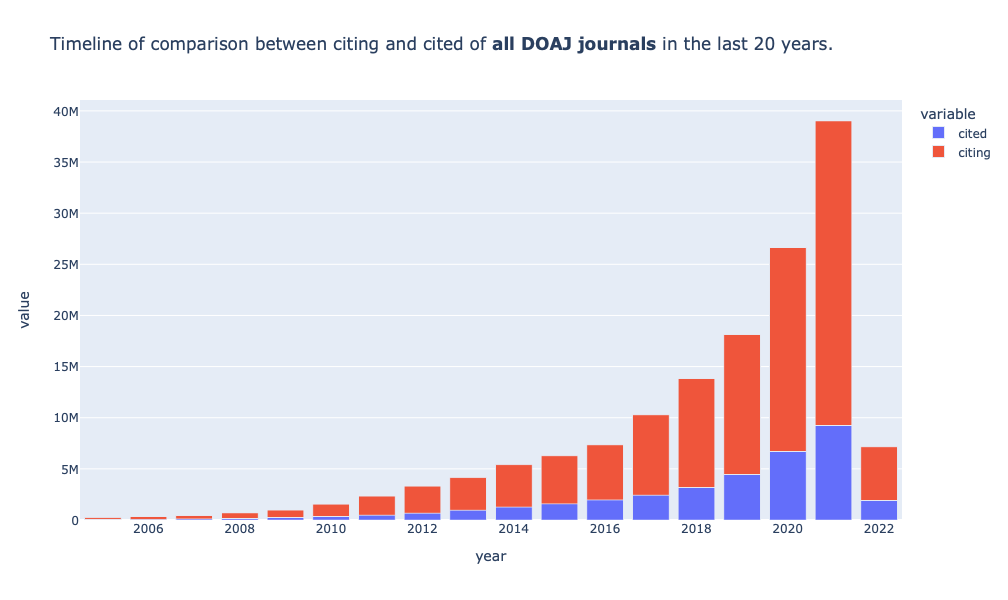

In [36]:
comp_years_fig = px.bar(final_df_years[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citing and cited of <b>all DOAJ journals</b> in the last 20 years.',
             height=600)
comp_years_fig.show()

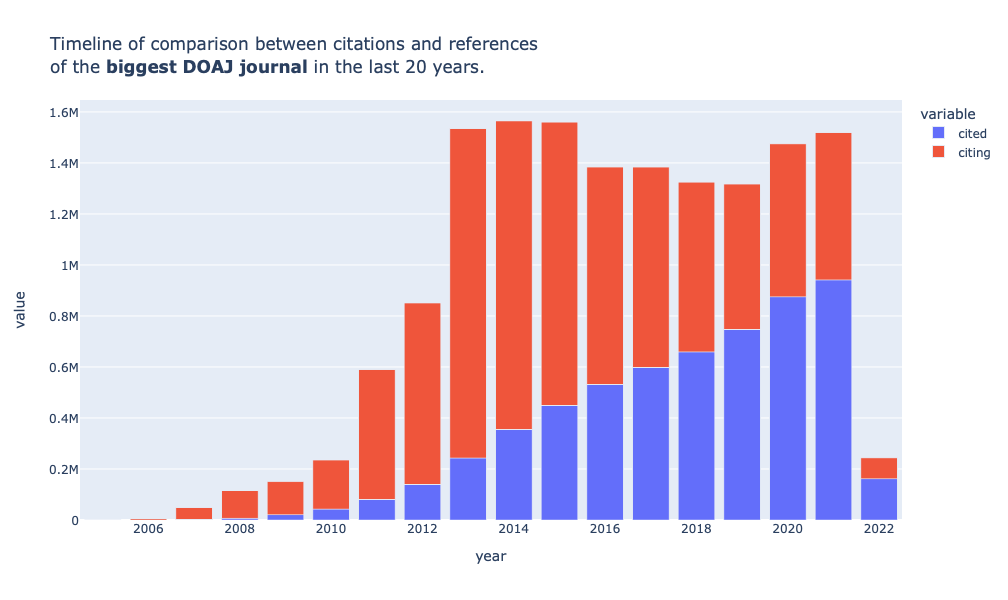

In [37]:
comp_years_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citations and references <br> of the <b>biggest DOAJ journal</b> in the last 20 years.',
             height=600)
comp_years_jrnl_fig.show()

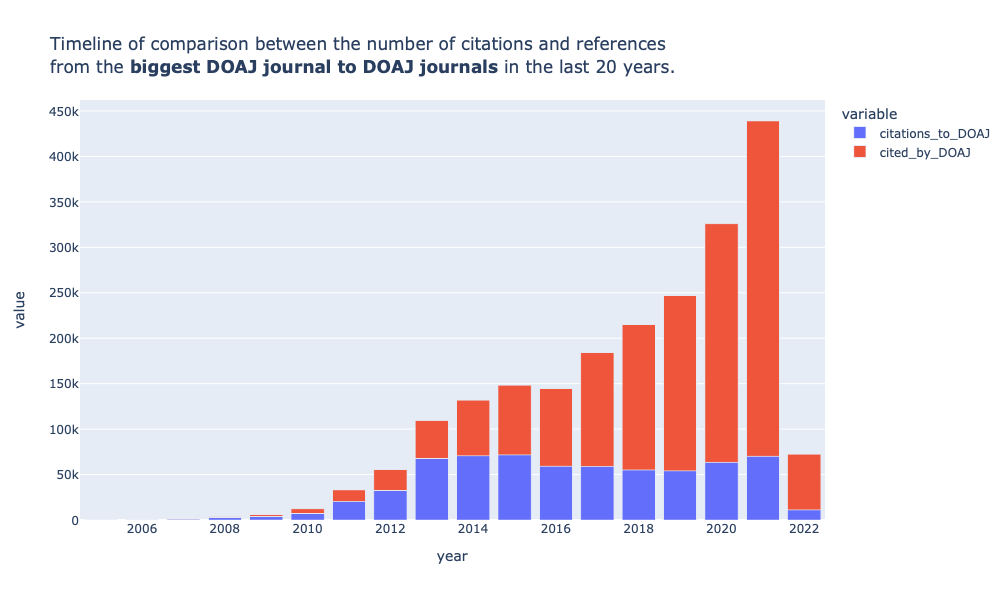

In [50]:
comp_years_jrnl_pcent_fig = px.bar(final_df_journal_1[-20:-2], x='year', y=['citations_to_DOAJ','cited_by_DOAJ'], 
             title='Timeline of comparison between the number of citations and references <br> from the <b>biggest DOAJ journal to DOAJ journals</b> in the last 20 years.',
             height=600)
comp_years_jrnl_pcent_fig.show()

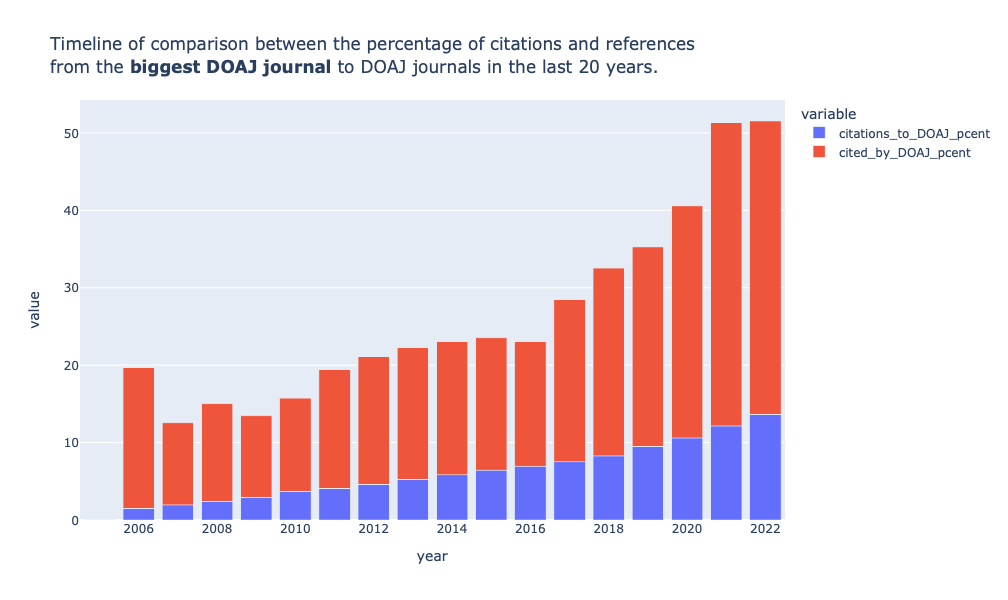

In [39]:
comp_years_fig_journal = px.bar(final_df_journal_1[-20:-2], x='year', y=['citations_to_DOAJ_pcent','cited_by_DOAJ_pcent'], 
             title='Timeline of comparison between the percentage of citations and references <br> from the <b>biggest DOAJ journal</b> to DOAJ journals in the last 20 years.',
             height=600)
comp_years_fig_journal.show()

Plotting timelines of percentages of citations.

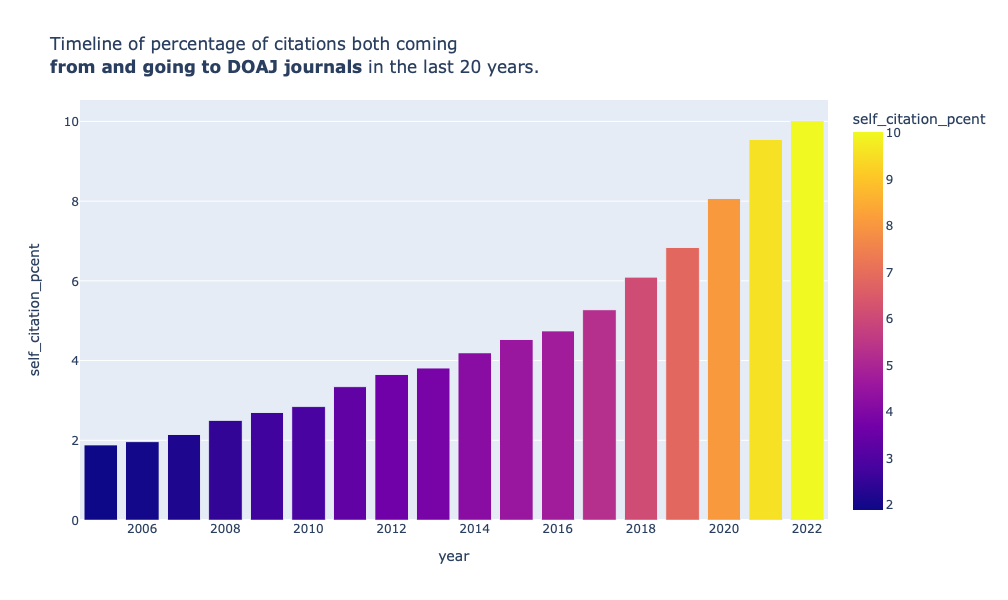

In [46]:
cit_pcent_years_fig = px.bar(final_df_years[-20:-2], x='year', y='self_citation_pcent', 
             hover_data=['self_citation_pcent'],
             title='Timeline of percentage of citations both coming <br><b>from  and going to DOAJ journals</b> in the last 20 years.', 
             color='self_citation_pcent',
             height=600)
cit_pcent_years_fig.show()

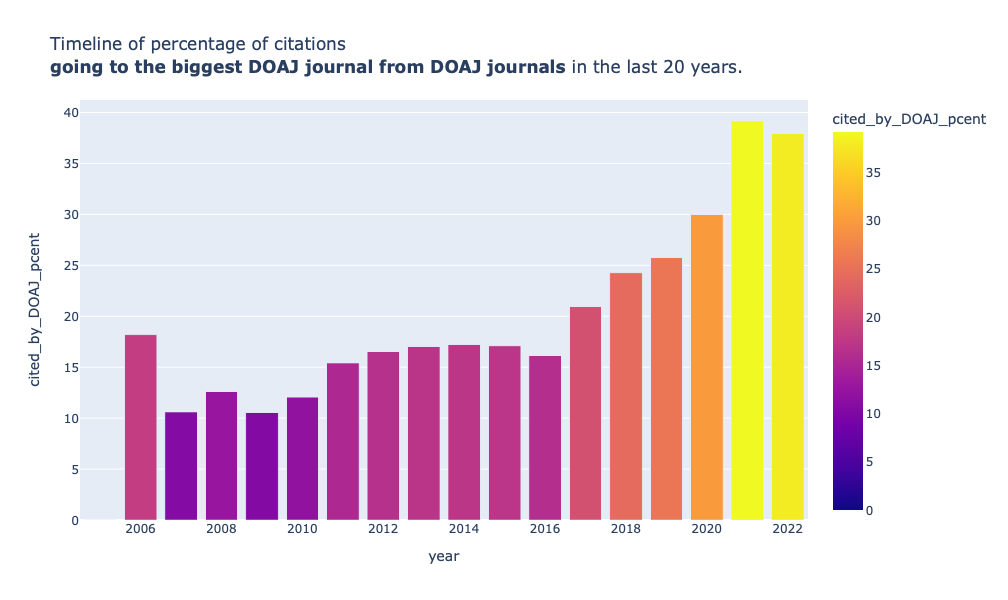

In [47]:
citby_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y='cited_by_DOAJ_pcent', 
             hover_data=['cited_by_DOAJ_pcent'],
             title='Timeline of percentage of citations <br><b>going to the biggest DOAJ journal from DOAJ journals</b> in the last 20 years.', 
             color='cited_by_DOAJ_pcent',
             height=600)
citby_jrnl_fig.show()

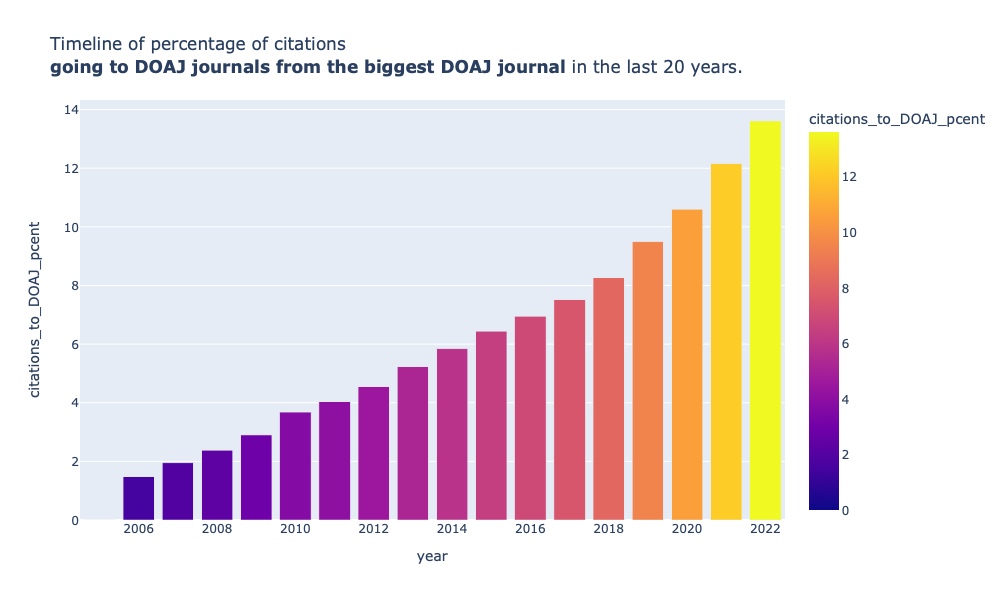

In [48]:
citto_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y='citations_to_DOAJ_pcent', 
             hover_data=['citations_to_DOAJ_pcent'],
             title='Timeline of percentage of citations <br><b>going to DOAJ journals from the biggest DOAJ journal</b> in the last 20 years.', 
             color='citations_to_DOAJ_pcent',
             height=600)
citto_jrnl_fig.show()

Plotting the type of errors we encountered.

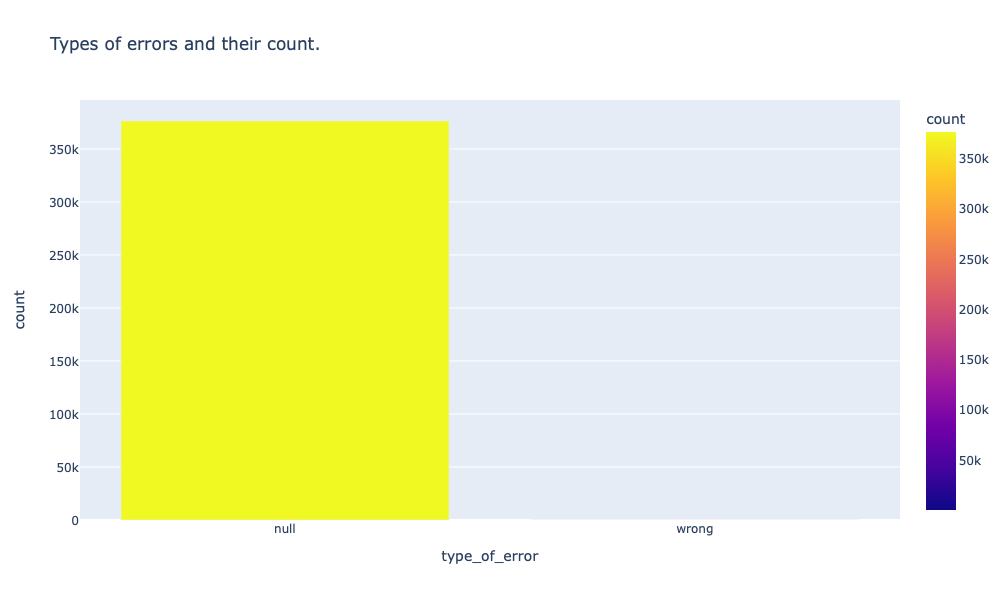

In [58]:
err_fig = px.bar(errors, x='type_of_error', y='count', 
             hover_data=['count'],
             title='Types of errors and their count.', 
             color='count',
             height=600)
err_fig.show()